In [46]:
import numpy as np
import pandas as pd
import random
from scipy.spatial import distance
from scipy import linalg
from scipy import stats
from scipy import optimize
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

In [17]:
def PCA(data_arr, n):
    """Takes in a non-standardized data array and performs PCA using SVD. Data should be in tidy format,
    with rows as observations and columns as variables"""
    num_rows = data_arr.shape[0]
    # Center the data
    centroid = np.mean(data_arr, axis=0)
    X_star = data_arr-centroid
    
    # Do SVD
    U, s, V_T = linalg.svd(X_star)
    eig_vectors = np.transpose(V_T)
    eig_vals = np.divide(s**2, num_rows-1)
    
    # Get the data projected into the number of PCA components specified
    PCA_data = np.matmul(X_star, eig_vectors[:,0:(n)])
    
    return PCA_data, eig_vectors, eig_vals, s, U, centroid

def plot_cluster_data(data, cluster_labels, plot_label_type):

    plt.figure(figsize=(15,15))
    
    clusters = np.unique(cluster_labels)
    
    if len(clusters) <= 16:
        colors = [ 'xkcd:red',    'xkcd:green',  'xkcd:magenta', 'xkcd:blue',
          'xkcd:purple', 'xkcd:orange', 'xkcd:cyan',    'xkcd:lime',
          'xkcd:pink',   'xkcd:yellow', 'xkcd:teal',    'xkcd:lavender',
          'xkcd:brown',  'xkcd:maroon', 'xkcd:olive',   'xkcd:navy' ]
        
    else:
        colors = cm.tab20(np.linspace(0, 1, len(clusters)))
    
    for cluster in clusters:
        plot_data_idx = (cluster_labels == cluster)
        plot_data = data[plot_data_idx,:]
        plt.scatter(plot_data[:,0], plot_data[:,1], marker='o', alpha=0.8, color=colors[cluster])
    
    if plot_label_type == "PCA":
        plt.title("Cluster data projected into first 2 PCs")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        

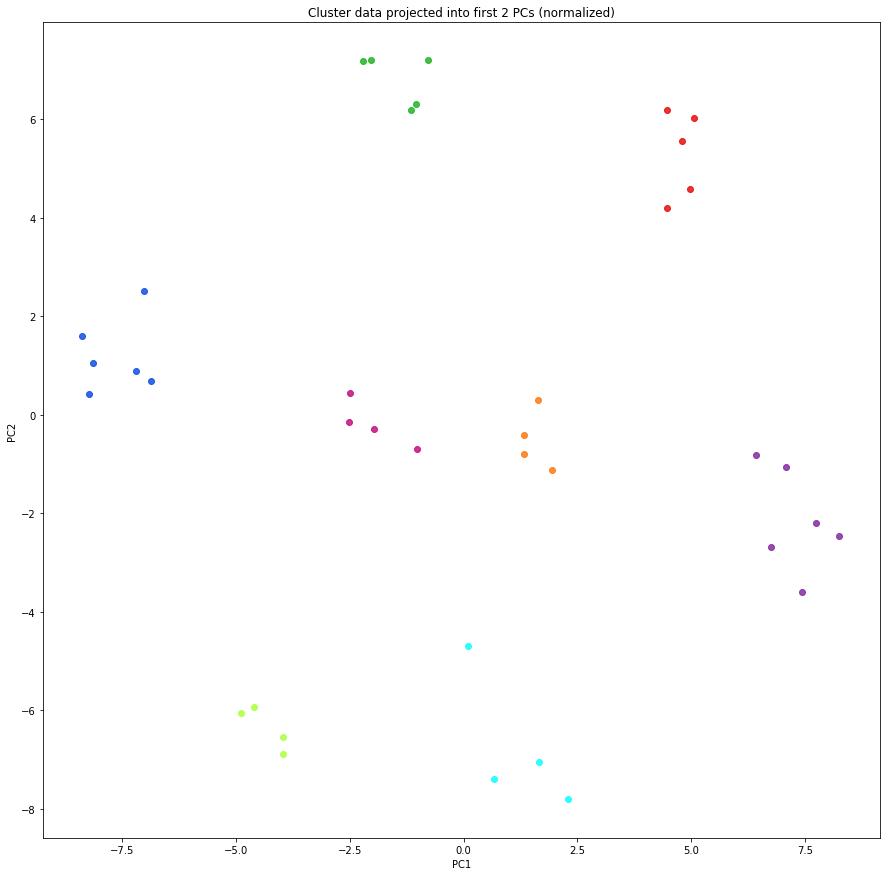

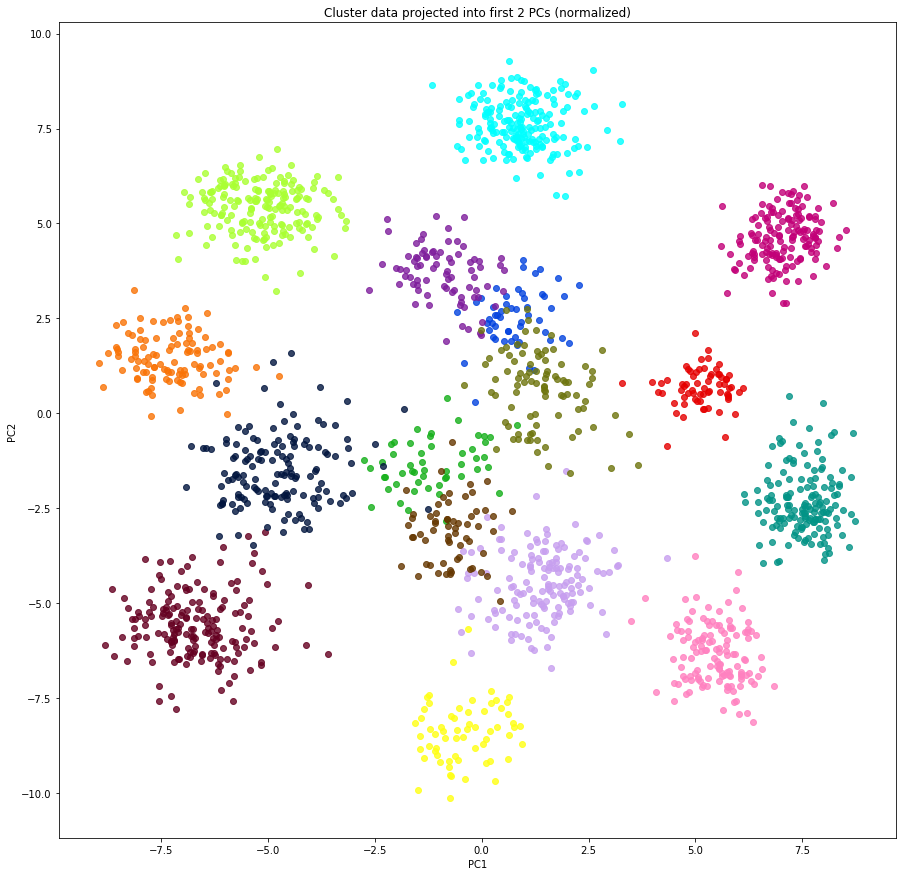

In [16]:
small_data = pd.read_csv("w11-data-small.tbl", header=0, delim_whitespace=True)
small_data_labels = small_data["type"].values
small_log_counts = np.log(small_data.drop("type", axis=1).values+1)

large_data = pd.read_csv("w11-data-large.tbl", header=0, delim_whitespace=True)
large_data_labels = large_data["type"].values
large_log_counts = np.log(large_data.drop("type", axis=1).values+1)

small_PCA_data = PCA(small_log_counts, 3)[0]
large_PCA_data = PCA(large_log_counts, 4)[0]

plot_cluster_data(small_PCA_data, small_data_labels, plot_label_type="PCA")
plot_cluster_data(large_PCA_data, large_data_labels, plot_label_type="PCA")

## Part 2

In [61]:
def get_sigmas(perp, data, dist_mat):
    
    sigma_list = []
    for r_idx in range(data.shape[0]):
        
        dist_vec = dist_mat[r_idx].flatten()
        # Initialize the bracketing end points 
        a, b = 1, 1
        while sigma_cost_func(a, dist_vec, perp) >= 0: a /= 2
        while sigma_cost_func(b, dist_vec, perp) <= 0: b *= 2
            
        # Use scipy_bisect to find the best sigma for this row and store it
        sigma = optimize.bisect( sigma_cost_func, a, b, args=(dist_vec,perp) )
        sigma_list.append(sigma)
        
    return sigma_list

def sigma_cost_func(sigma, dist_vec, desired_perp):
    # find the diff between actual and desired perp for a given row's sigma
    
    f = lambda d: np.exp(-np.square(d)/(2*np.square(sigma)))
    p_vec = np.array([f(d) for d in dist_vec])
    p_vec = np.divide(p_vec, np.sum(p_vec)-1) # the -1 is for the 0 term in the sum
    
    H = -np.sum( np.asarray([p*np.log2(p) for p in p_vec]) )
    
    actual_perp = 2**H
    
    return actual_perp-desired_perp

In [62]:
dist_mat = np.asarray([distance.euclidean(row_1, row_2) for row_1 in small_log_counts 
                       for row_2 in small_log_counts])
dist_mat = dist_mat.reshape(small_log_counts.shape[0], small_log_counts.shape[0])

test = get_sigmas(20, small_log_counts, dist_mat)
test

[4.197652203710959,
 4.713810936613527,
 4.123568942605971,
 4.6938166107022425,
 4.342810555750248,
 4.66695353635555,
 4.212017093731674,
 4.555209499509374,
 4.806036912099216,
 4.660212501146134,
 4.450391267367877,
 4.347532049950814,
 4.580221786916127,
 4.200233080071257,
 4.174084415794596,
 4.8907757498175215,
 4.3434435456354095,
 4.772948740083166,
 4.65284995407751,
 4.34849481205606,
 4.513863881665884,
 4.369350818763678,
 4.7171457237343475,
 4.561027947611137,
 4.595936849216059,
 4.551387676508284,
 4.718619331024229,
 4.295880410857762,
 4.5811346567895725,
 4.417134432804005,
 4.747972236441228,
 4.603848684486593,
 4.193438025474961,
 4.478800645457568,
 4.634988487863438,
 4.57887793721261,
 4.548461718873341,
 4.654270978464638]

## Part 3

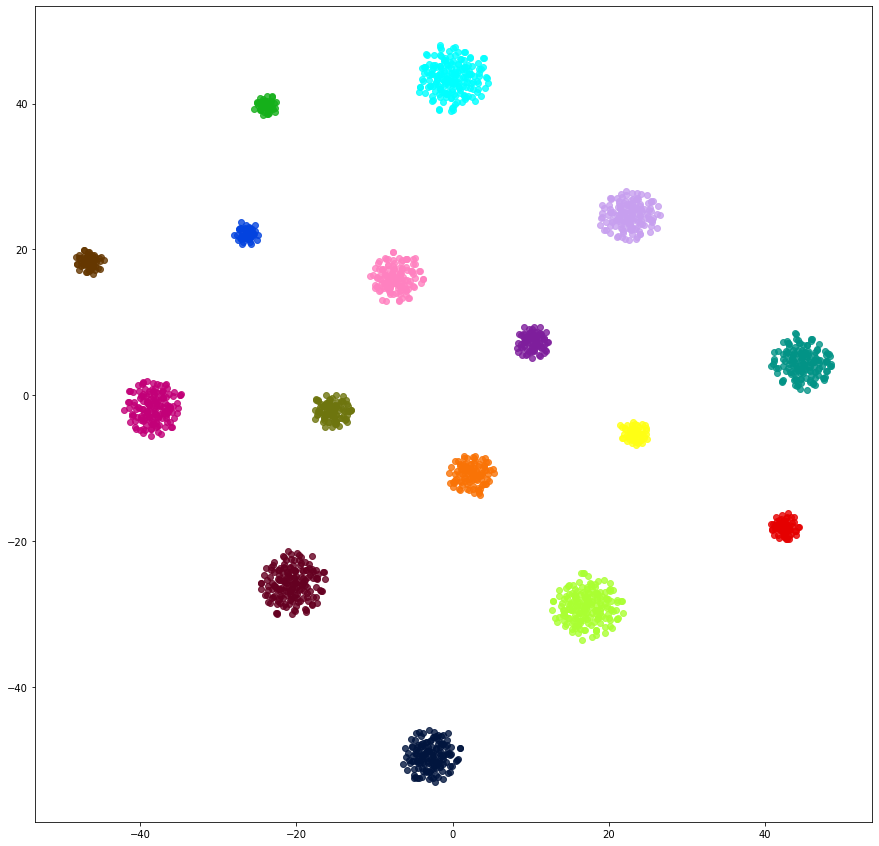

In [19]:
test = TSNE().fit_transform(large_log_counts)
plot_cluster_data(test, large_data_labels, plot_label_type=False)

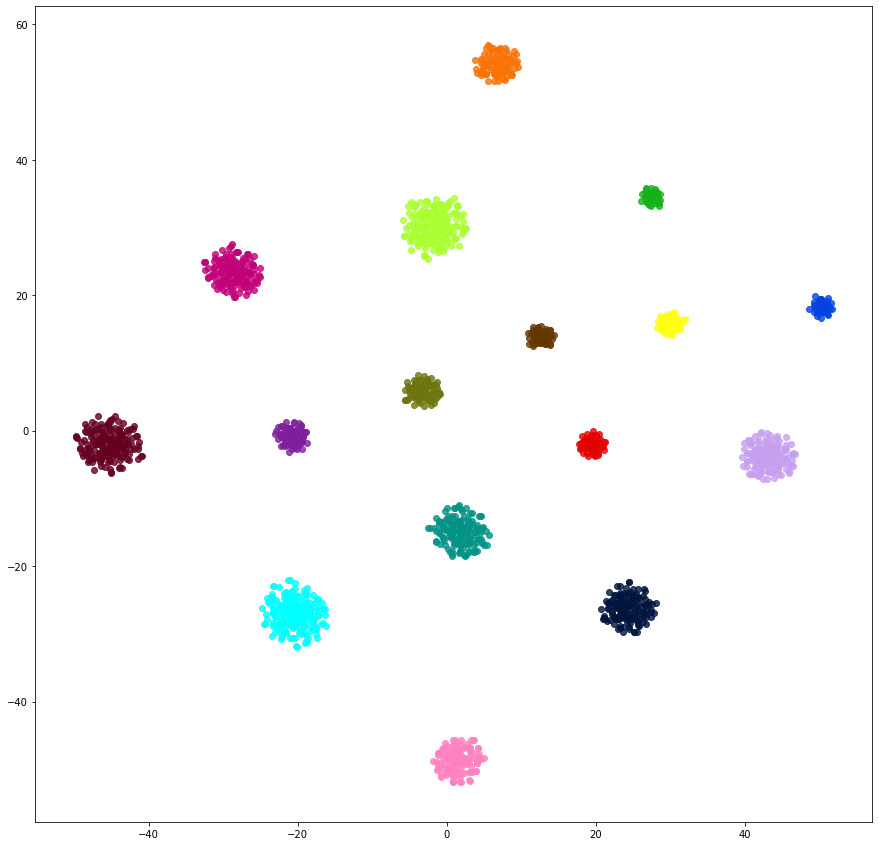

In [20]:
test = TSNE().fit_transform(large_log_counts)
plot_cluster_data(test, large_data_labels, plot_label_type=False)